# SNAP Utilization Data EDA
## Author: Liana Principe

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import data_processing

This section of the project includes all the graphs and plots used to perform Exploratory Data Analysis for the SNAP prediction process. The graphs are displayed to show the differences between survey recipients who have utilized SNAP benefits vs. those who have not used SNAP benefits. These graphs help give a better understanding of the data distribution and identifying features that might be more significant in the modelling process. 

In [3]:
all_df = pd.read_csv('C:/Users/liana.principe/OneDrive - insidemedia.net/Documents/Coding & Portfolio/Bootcamp/Capstone Project/faps_household_puf (2).csv', index_col = 'hhnum')

reference_file = pd.read_csv('C:/Users/liana.principe/OneDrive - insidemedia.net/Documents/Coding & Portfolio/Bootcamp/Capstone Project/SNAPHH_column_reference.csv')

snap_target = reference_file['Target_variables'].loc[reference_file['Target_variables'].notnull()]
socio_economic = reference_file['Socio_economic'].loc[reference_file['Socio_economic'].notnull()]
food_support = reference_file['Food_support'].loc[reference_file['Food_support'].notnull()]
nutrition_survey = reference_file['Nutrition_survey'].loc[reference_file['Nutrition_survey'].notnull()]
food_security_survey = reference_file['Food_security_survey'].loc[reference_file['Food_security_survey'].notnull()]
shopping_survey = reference_file['Shopping_survey'].loc[reference_file['Shopping_survey'].notnull()]
snap_variables = reference_file['SNAP_variables'].loc[reference_file['SNAP_variables'].notnull()]
discard_variables =reference_file['Discard_variables'].loc[reference_file['Discard_variables'].notnull()]

pd.options.display.max_rows = 300
pd.options.display.max_columns = 300

The document is read into jupyter notebook with a reference file that separates and consolidates the variables into specific lists. This is included for easier organization of variable categories.

Snap Target = the variables of interest in this study. Comprised of household SNAP benefit receivers at various time periods (currently, recently, or ever)

Socio-Economic = features of a household that reveal insight to the social or economic status of the Household. This will be the foundation of features of interest used for the model

Food Support = Reveals information of household usage of alternative food support resources (WIC, food pantries, etc). Although informative, this information is separated because there is a chance of high correlation with the target dependent variable. As such these are put in an individual column to be included or excluded with ease according to the needs of this study.

Nutrition Survey = Nutrition Survey results that are included in the dataset. These are separated from the foundational features of interest because this information may be beneficial as an addition, but is not always gauranteed to be provided. As such, it is consolidated to it's own section to be included and excluded in an easier manner.

Food Security Survey = Food Security Survey results from respondents in the ERS survey. While this is informative

Shopping Survey = Exluded because this information is not likely available in the real world

SNAP Variables = SNAP administrative data that will be exluded from the logistic model due to data leakage with the ideology that rows with non-NaN values in these columns are heavily correlated if not directly to those experiencing food insecurity. These variables are likely expected to introduce data leakage

Discarded Variables: These are variables that will not be considered in this study due to irrelevance, data leakage, or other reasons. Some of these variables are inputed for the survey administration team which is important for organization of the data in the dataset, but pose no meaning for model building. Within the data, there are two granularities of data calculation: one at the household level and one at the family level. This research is following the data at the household level, but the family level data is exlucded to prevent confusion in the model. Lastly, other variables are excluded due to irrelevance of the model or question that leads this research.

Further details of the variables can be seen in the documentation


## Socio-Economic EDA

EDA will be performed on Socio-economic data first as this dataset is most relevant to the features trained and tested in the prediction model. These features represent location data, household data, income, expense information, and food collection data.

Preliminary steps are conducted here to clean and process the dataframe. This includes 
- recoding survey administrative data
- Removing any rows where values in the target variable are undefined
- Converting all features to numerical data type
- Identifying the rows with null values in them

For the socio-economic feature dataset, rows with null values are removed below. The code used to conduct this process can be seen in the `data_processing.py` document.

In [5]:
x_se,y_se, df_se, nulls_df = data_processing.SNAP_clean(all_df,socio_economic ,'snapnowhh')
display(df_se.head())

,nonmetro,region,rural,hhsize,numguests,guestspay,hhsizechange,hhsizechild,hhsizemove,hhsizechangeoth,pctpovguidehh_r,inchhreported_r,selfemployhh,selfemployfoodhh,jobchangeany,jobchangecat,earnlessnum_r,earnmorenum_r,earnsamenum,housingown,housingpub,housingsub,liqassets,anyvehicle,vehiclenum,caraccess,largeexp,exprentmrtg_r,exphomeins_r,expproptax_r,exppubtrans_r,expelectric_r,expheatfuel_r,expwastedisp_r,exphealthins_r,expcopay_r,expdoctor_r,exprx_r,expchildcare_r,expchildsupport_r,expadultcare_r,schservebrkfst,anypregnant,primstoredist_s,primstoredist_d,primstoretime_d,primstoredist_w,primstoretime_w,primstoretravelmode,primstoretravelcost,primstoretraveltime,altstoredist_s,altstoredist_d,altstoretime_d,altstoredist_w,altstoretime_w,foodstorenum,shopconv,shopbigbox,shopclub,shopdollar,shopbakery,shopmeatfish,shopvegstand,shopanyother,shopothnone,gardenown,gardenelse,farmersmarket,huntfish,anyvegetarian,anylactoseintol,anyfoodallergy,allergywheat,allergymilk,allergyegg,allergyfish,allergyshellfish,allergycorn,allergypeanut,allergyothnut,allergysoy,allergyoth,anydieting,anytobacco,anyillness,billpayprob6mos,evicted6mos,utilnotpaid6mos,cashadv6mos,paydayloan6mos,ndinnersouthh,nmealshome,nmealstogether,snapnowhh
hhnum,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100012,1,3,1,5,0,0,0,0,0,0,207.360092,4667.330078,0,0,1,1,0,0,1,1,0,0,1,1,2,0,0,500.0,0.0,0.0,0.0,289.0,0.0,17.0,411.670013,0.0,0.0,18.0,0.0,0.0,0,1,0,0.327,0.682,2.37,0.662,12.450000,1,0.0,4,0.857,1.455,7.80,1.444,28.77,5,1,1,0,1,1,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,9,2,1
100015,0,3,0,1,0,0,0,0,0,0,128.916748,1200.000000,1,0,0,0,0,0,0,1,1,0,1,1,1,0,0,290.0,0.0,0.0,0.0,88.0,0.0,0.0,98.000000,20.0,0.0,125.0,0.0,0.0,0,0,0,1.042,1.352,7.38,0.000,0.000000,1,0.0,5,0.000,0.000,0.00,0.000,0.00,5,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0
100024,0,2,0,2,0,0,0,0,0,0,398.506287,5024.500000,0,0,1,1,0,1,0,1,0,0,1,1,2,0,0,1125.0,13.0,0.0,0.0,125.0,50.0,49.0,300.000000,0.0,0.0,65.0,0.0,0.0,0,1,0,0.895,1.208,3.77,1.195,23.780001,1,0.0,3,1.968,2.397,6.73,0.000,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,2,0
100026,0,3,1,2,1,0,0,0,0,0,142.762726,1800.000000,0,0,0,0,0,0,0,2,0,0,1,1,1,0,1,0.0,0.0,0.0,0.0,132.0,0.0,0.0,166.830002,80.0,100.0,150.0,0.0,0.0,0,0,0,1.715,4.358,9.98,0.000,0.000000,1,0.0,5,1.714,4.357,9.98,0.000,0.00,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,2,7,21,0
100028,0,1,0,7,0,0,1,0,1,0,137.348984,3998.000000,0,0,1,1,1,0,0,1,0,0,1,1,1,0,0,475.0,0.0,0.0,0.0,86.0,70.0,100.0,31.000000,0.0,0.0,3.0,0.0,0.0,0,0,0,1.246,1.548,4.23,0.000,0.000000,1,0.0,15,2.383,3.019,7.57,0.000,0.00,5,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,7,3,1


In [6]:
x_se, y_se, df_se = data_processing.delete_nans(df_se, 'snapnowhh', 0)
print(f'''Cleaned Dataframe Shape: {df_se.shape}
Cleaned X Shape: {x_se.shape}
Cleaned Y Shape: {y_se.shape}''')

Cleaned Dataframe Shape: (4798, 95)
Cleaned X Shape: (4798, 94)
Cleaned Y Shape: (4798,)


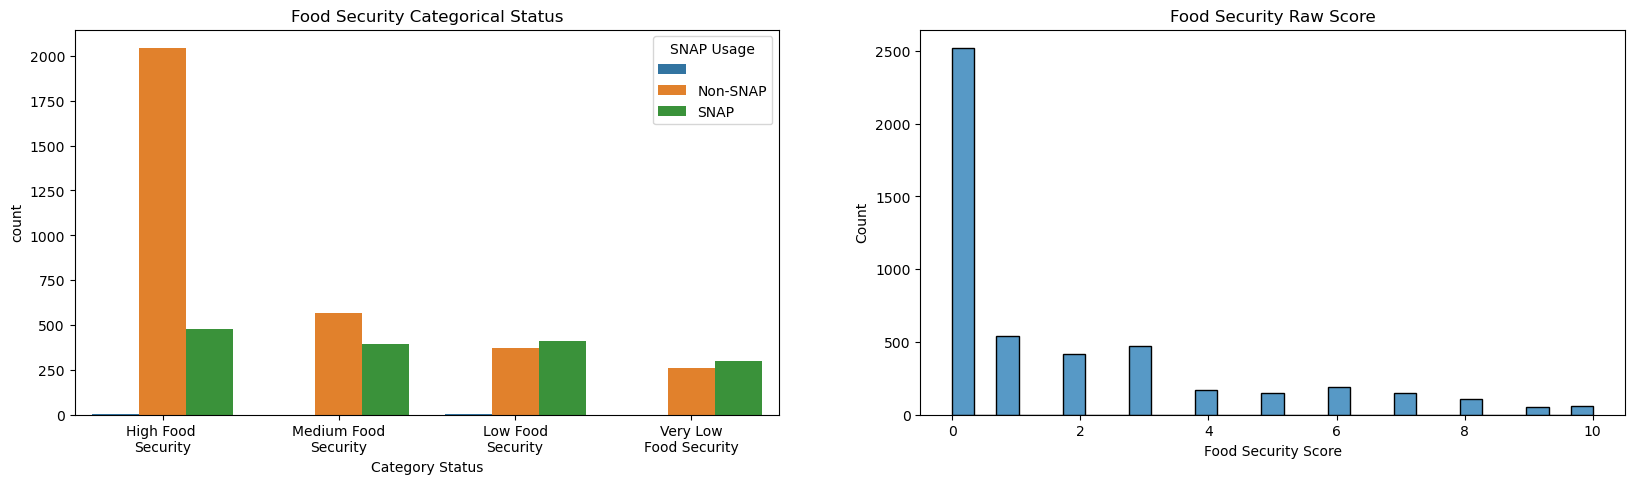

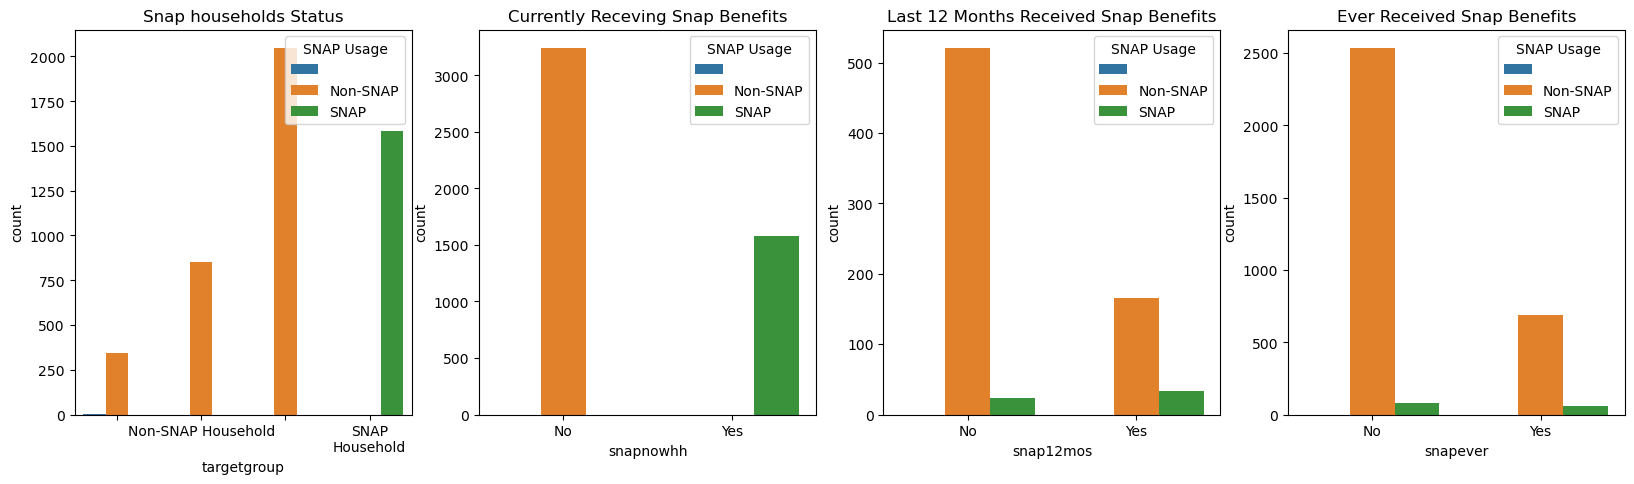

In [14]:
# Plotting the target variables and relevant features
#Top Plot
fig1, (ax1, ax2)= plt.subplots(1,2,figsize = (20,5))
plt.subplot(1,2,1)
ax1 = sns.countplot(data=all_df, x='adltfscat', hue = 'snapnowhh')
ax1.set(title = 'Food Security Categorical Status', xticks = range(len(all_df['adltfscat'].unique())), xticklabels=['High Food \nSecurity', 'Medium Food\nSecurity','Low Food\nSecurity','Very Low\nFood Security'], xlabel = 'Category Status')
plt.legend(title='SNAP Usage', loc='upper right', labels=['','Non-SNAP', 'SNAP'])
plt.subplot(1,2,2)
ax2 = sns.histplot(data = all_df, x = 'adltfsraw')
ax2.set(title = 'Food Security Raw Score', xlabel = 'Food Security Score')


#Bottom Plot
fig2 = plt.subplots(1,4, figsize = (20,5))
for i in range(len(snap_target)-1):
    titles = ['Snap households Status','Currently Receving Snap Benefits','Last 12 Months Received Snap Benefits','Ever Received Snap Benefits']
    plt.subplot(1,4,i+1)
    sp =sns.countplot(data = all_df, x =all_df[snap_target[i]].loc[all_df[snap_target[i]]>=0], hue = 'snapnowhh')
    plt.legend(title='SNAP Usage', loc='upper right', labels=['','Non-SNAP', 'SNAP'])
    sp.set(title=titles[i])
    if i>0:
        sp.set(xticks= range(2), xticklabels = ['No','Yes'])
    else:
        sp.set(xticks= range(len(all_df[snap_target[i]].unique())), xticklabels = ['','Non-SNAP Household','','SNAP\nHousehold'])


In [16]:
'''sns.heatmap(df_se.corr(),cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()'''

"sns.heatmap(df_se.corr(),cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix\nfig=plt.gcf()\nfig.set_size_inches(20,12)\nplt.show()"

In [5]:
def eda_plot(rows, columns, df, variable_dict, title_list=0):
    fig, ax = plt.subplots(rows, columns, figsize = (20,5))
    keys = list(variable_dict.keys())
    for i in range(len(variable_dict.keys())):
        plt.subplot(1,4,i+1)
        plot=sns.countplot(data = df, x = keys[i], hue = 'snapnowhh', palette=['thistle1',"blueviolet"])
        plt.legend(title='SNAP Usage', loc='upper right', labels=['Non-SNAP', 'SNAP'])
        plot.set(xticks= range(len(df[keys[i]].unique())), xticklabels = variable_dict[keys[i]])
        if title_list>0:
            plot.set(title=title_list[i])
        else:
            plot.set(title=keys[i])
    plt.tight_layout()

In [ ]:
'''#Location: nonmetro, region, rural
location_map = {'nonmetro':['Metro','Nonmetro'],'region':['region1','region2','region3','region4'],'rural':['Non-rural','Rural']}
eda_plot(1,3,df_se, location_map)'''

In [6]:
def barplot(df,feature, xticks_list, title):
        plot=sns.countplot(data = df, x =feature, hue = 'snapnowhh', palette='BuPu')
        plt.legend(title='SNAP Usage', loc='upper right', labels=['Non-SNAP', 'SNAP'])
        plot.set(xticks= range(len(df[feature].unique())), xticklabels = xticks_list)
        plt.title(title)

In [7]:
def density_plot(df, feature, xlabel, title):
    sns.kdeplot(df.loc[(df_se['snapnowhh']==0),feature], color='r', fill=True, label='Non-SNAP Households')  
    sns.kdeplot(df.loc[(df_se['snapnowhh']==1),feature], color='b', fill=True, label='SNAP Households')
    plt.xlabel(xlabel)
    plt.title(title)
    plt.ylabel('Probability Density')
    plt.legend()

#### Location Data

Given the public dataset, specific location and state data are not provided, however, some data does reveal what region the survey recipients reside in and if those regions are considered metro or rural areas. `nonmetro` is based on whether or not the county in which the household lives is within a Core-based Statistical Area (CBSA), while the `rural` feature is based on the Census tract. The term "CBSA" refers collectively to both metropolitan statistical areas and micropolitan areas. Urban and rural are defined in the Census Bureau's urbanized area definitions, where rural areas are sparsely populated areas with fewer than 2,500 people, and urban areas are areas with more than 2,500 people. A census tract is urban if the geographic centroid of the tract is in an area with more than 2,500 people; all other tracts are rural. A photo is provided below to get an idea of metropolitan areas in the United States. This photo does NOT represent the data or indicate locations of what the data marks as metro or non-metro. This is to provide a general idea. 

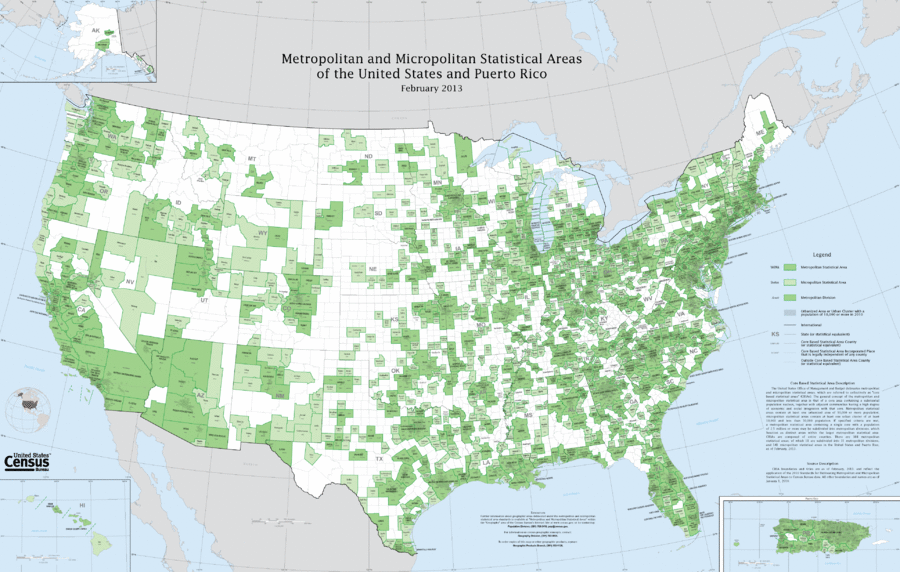

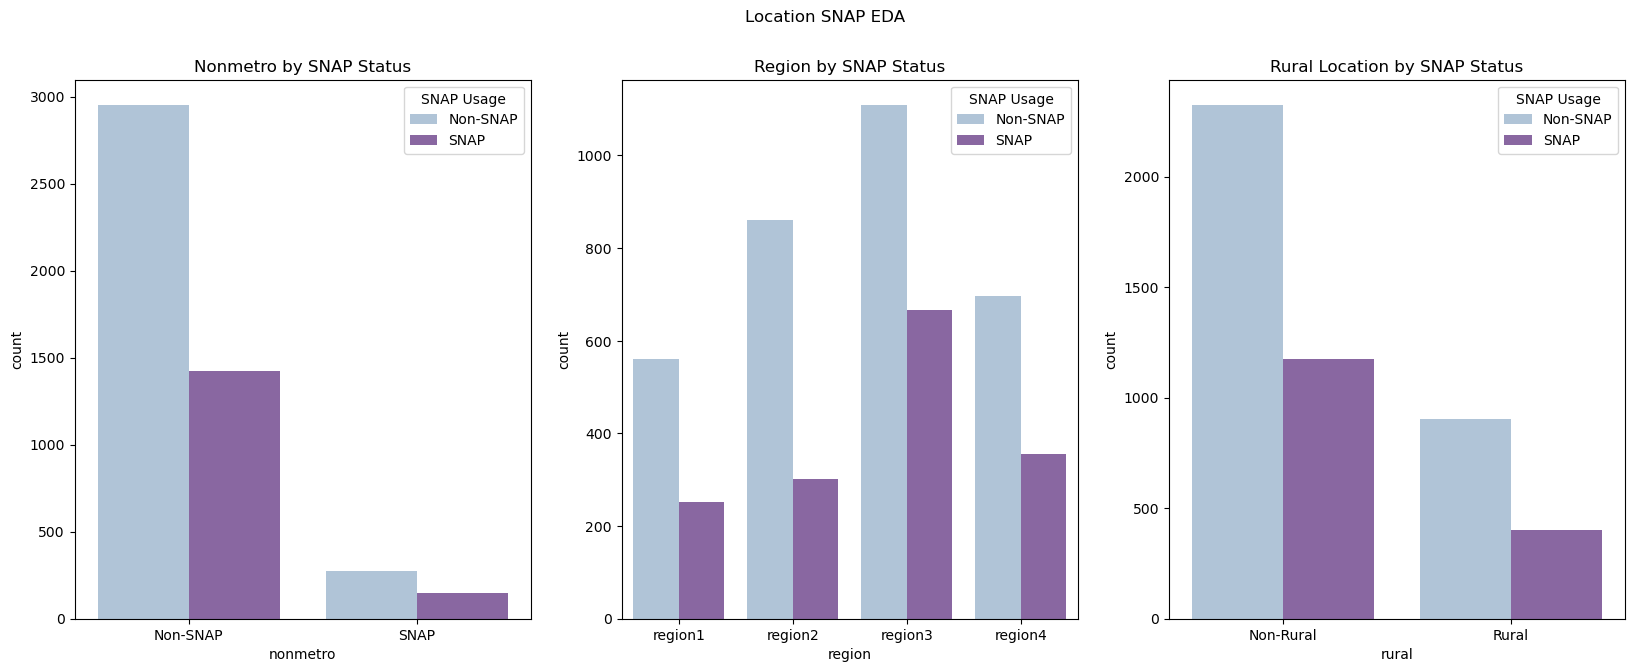

In [8]:
fig, ax = plt.subplots(1,3, figsize = (20,7))
plt.suptitle('Location SNAP EDA')
plt.subplot(1,3,1)
barplot(df_se, 'nonmetro', ['Metro', 'Non-metro'], 'Nonmetro by SNAP Status')
plt.subplot(1,3,2)
barplot(df_se, 'region',['Northeast','Midwest','South','West'], 'Region by SNAP Status')
plt.subplot(1,3,3)
barplot(df_se, 'rural', ['Non-Rural','Rural'],'Rural Location by SNAP Status')

By looking at the visualizations, it seems highly likely that the rural feature holds some sort of significance between SNAP and non-SNAP

#### Household Characteristics Data

Household Characteristics addresses variables such as the size of the household, the members of the household, the status of children

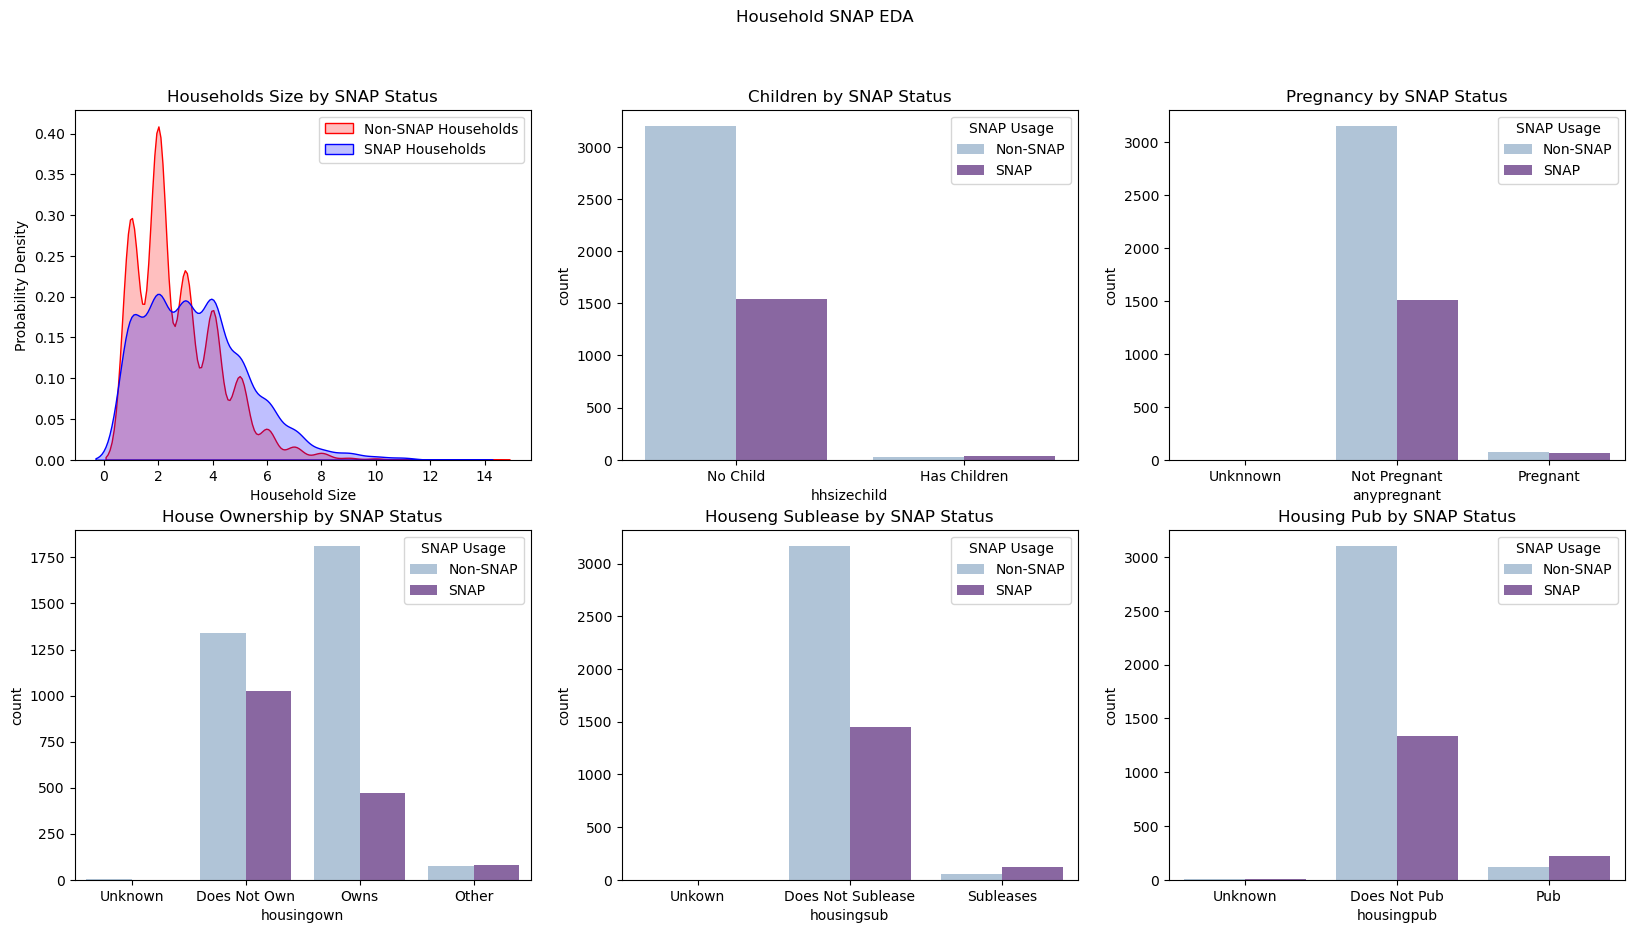

In [9]:
fig, ax = plt.subplots(2,3, figsize = (20,10))
plt.suptitle('Household SNAP EDA')
plt.subplot(2,3,1)
density_plot(df_se, 'hhsize', 'Number of Residents', 'Household Size by SNAP Status')
plt.subplot(2,3,2)
barplot(df_se, 'hhsizechild',['No Child', 'Has Children'], 'Children by SNAP Status')
plt.subplot(2,3,3)
barplot(df_se, 'anypregnant',['Unknnown','Not Pregnant', 'Pregnant'], 'Pregnancy by SNAP Status')
plt.subplot(2,3,4)
barplot(df_se, 'housingown',['Unknown','Rent', 'Owns','Other'], "Rents, Owns, or Doesn't Pay for Housing\nby SNAP Status")
plt.subplot(2,3,5)
barplot(df_se, 'housingsub',['Unknown','Not Subsidized', 'Subsidized'], 'Subsidized Housing by SNAP Status')
plt.subplot(2,3,6)
barplot(df_se, 'housingpub',['Unknown','Not Public\nHousing', 'Public Housing'], 'Public Housing by SNAP Status')

Household Size has historically been considered significant for SNAP Usage, however the distribution in the density plot diagram cannot confirm nor deny by visual representation alone.

There seems to be a visual difference in the housing diagrams between those who Own their house, have subsidized housing, and live in public housing.

#### Income and Poverty Guidelines Data

"plt.subplot(1,4,3)\ndensity_plot(df_se, 'povguide_hh','Poverty Guideline', '2012 monthly poverty guideline for HH size\nby SNAP Status')\nplt.subplot(1,4,4)\ndensity_plot(df_se, 'povthresh_hh','Poverty threshold', '2012 monthly poverty threshold for HH size\nby SNAP Status')"

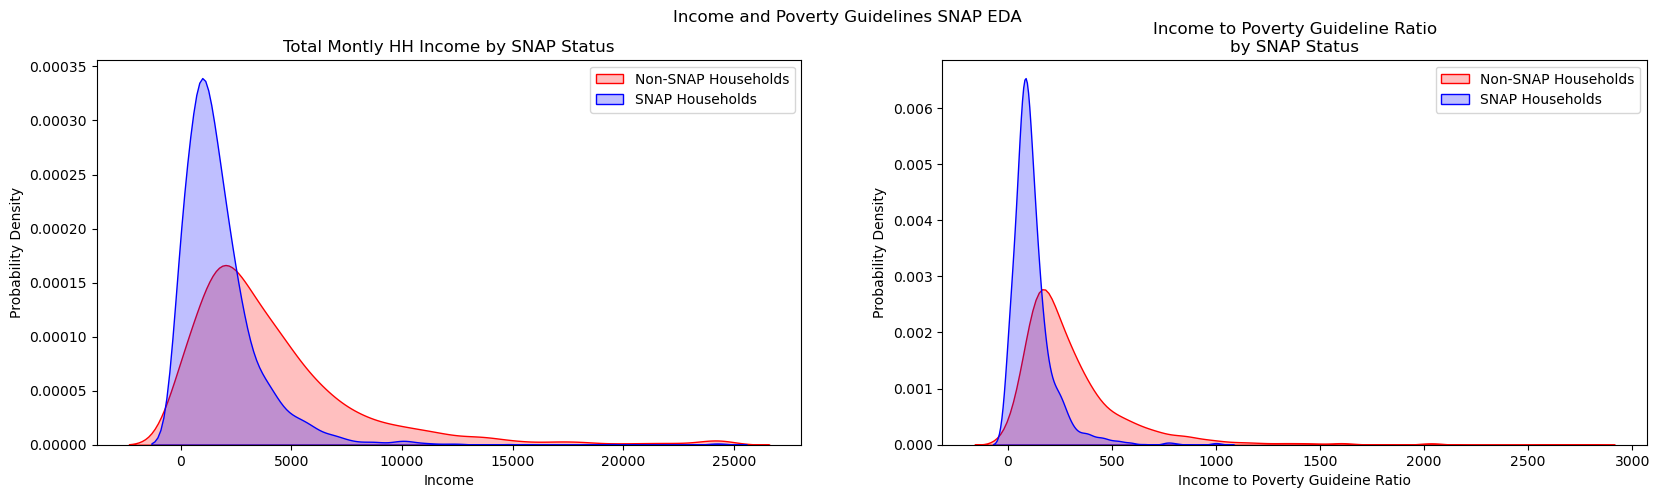

In [21]:
fig, ax = plt.subplots(1,2, figsize = (20,5))
plt.suptitle('Income and Poverty Guidelines SNAP EDA')
plt.subplot(1,2,1)
density_plot(df_se, 'inchhreported_r', 'Income', 'Total Montly HH Income by SNAP Status')
plt.subplot(1,2,2)
density_plot(df_se, 'pctpovguidehh_r','Income to Poverty Guideine Ratio', 'Income to Poverty Guideline Ratio\nby SNAP Status')
'''plt.subplot(1,4,3)
density_plot(df_se, 'povguide_hh','Poverty Guideline', '2012 monthly poverty guideline for HH size\nby SNAP Status')
plt.subplot(1,4,4)
density_plot(df_se, 'povthresh_hh','Poverty threshold', '2012 monthly poverty threshold for HH size\nby SNAP Status')'''

Both the income feature and poverty guideline feature appear to have visual differences between SNAP and non-SNAP recipients. This will be considered when building the model.

#### Expense SNAP Data

Expense data consists of the monthly expenses the household paid for conditions like mortgage, property taxes, electricity, fuel, health insurance, doctor bills, health insurance, 

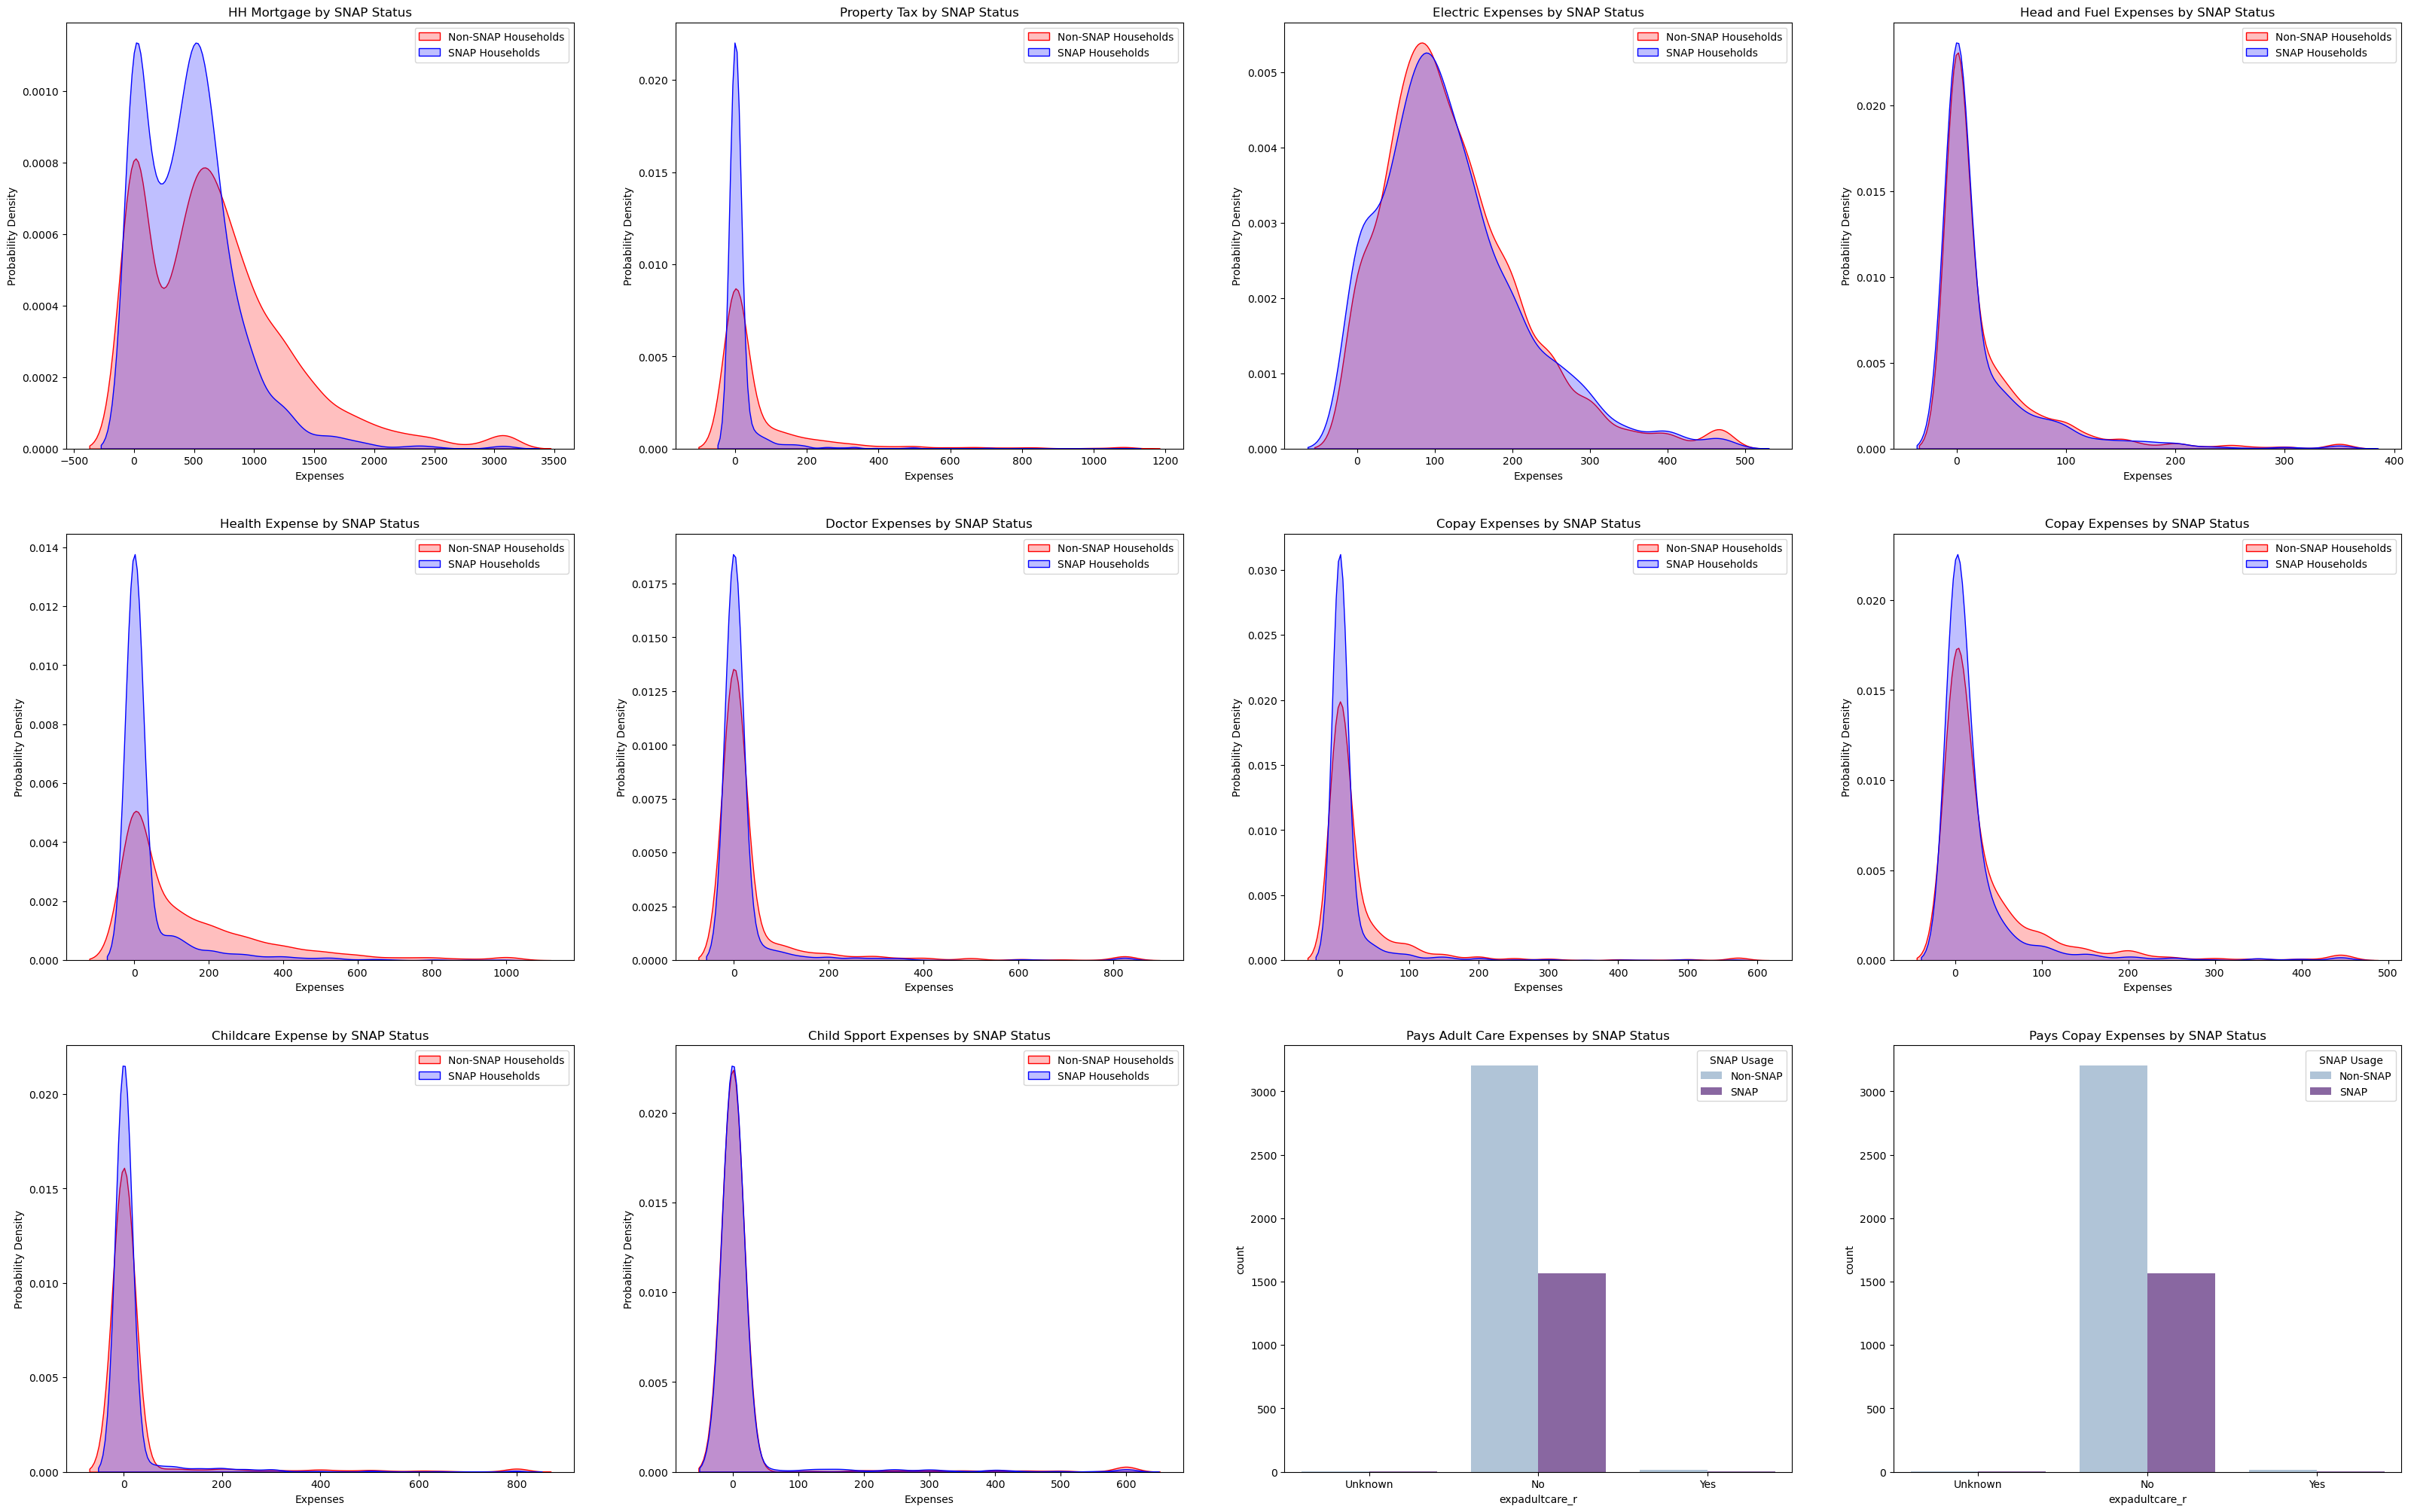

In [171]:
fig1, ax = plt.subplots(3,4, figsize = (40,25))
plt.suptitle('Monthly Expenses')
plt.subplot(3,4,1)
density_plot(df_se, 'exprentmrtg_r','Expenses', 'Rent/Mortgage\nby SNAP Status')
plt.subplot(3,4,2)
density_plot(df_se, 'exphomeins_r','Expenses', 'Home Insurance by SNAP Status')
plt.subplot(3,4,3)
density_plot(df_se, 'expproptax_r','Expenses', 'Property Tax by SNAP Status')
plt.subplot(3,4,4)
density_plot(df_se, 'expelectric_r','Expenses', 'Electric Expenses by SNAP Status')
plt.subplot(3,4,5)
density_plot(df_se, 'expheatfuel_r','Expenses', 'Heating Fuel Expenses by SNAP Status')
plt.subplot(3,4,6)
density_plot(df_se, 'exphealthins_r','Expenses', 'Health Insurance Expense by SNAP Status')
plt.subplot(3,4,7)
density_plot(df_se, 'expdoctor_r','Expenses', 'Doctor/Hospital Expenses by SNAP Status')
plt.subplot(3,4,8)
density_plot(df_se, 'expcopay_r','Expenses', 'Copay Expenses by SNAP Status')
plt.subplot(3,4,9)
density_plot(df_se, 'exprx_r','Expenses', 'Prescription Expenses by SNAP Status')
plt.subplot(3,4,10)
density_plot(df_se, 'expchildcare_r','Expenses', 'Childcare Expense by SNAP Status')
plt.subplot(3,4,11)
density_plot(df_se, 'expchildsupport_r','Expenses', 'Child Spport Expenses by SNAP Status')
plt.subplot(3,4,12)
barplot(df_se, 'expadultcare_r',['Unknown','No','Yes'], 'Pays Copay Expenses by SNAP Status')

#### Health SNAP Data

These features address certain health components of the residents in the households from the study. These include if anyone in the household has any illnesses, smokes tobacco, is currently dieting, or has any food allergies.

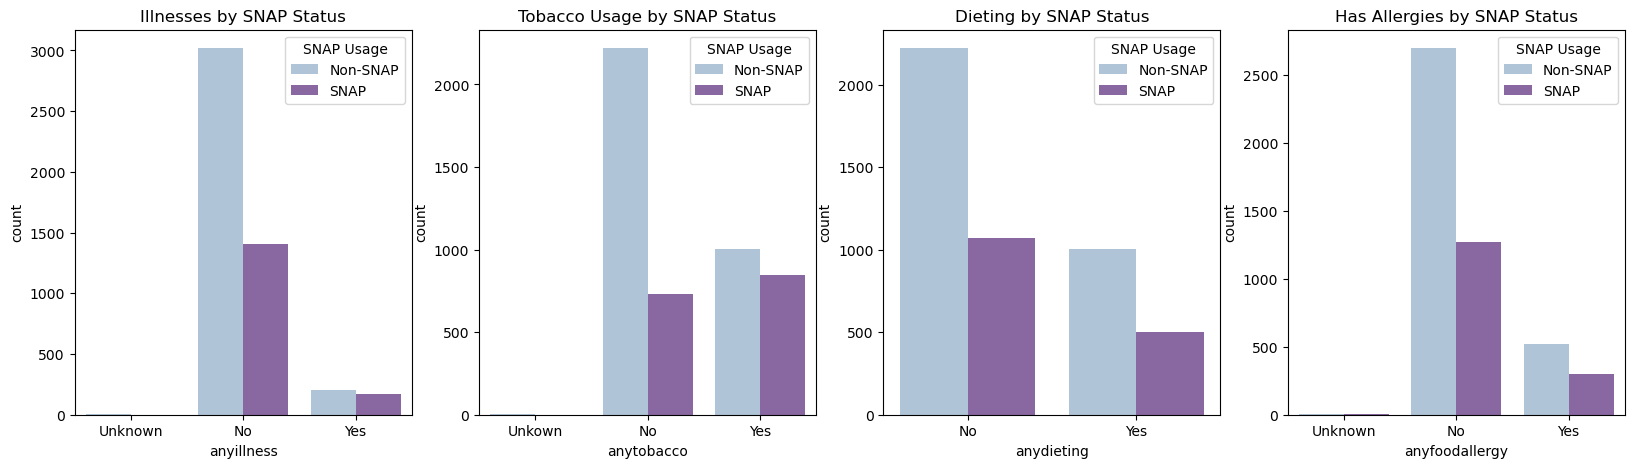

In [13]:
fig1, ax = plt.subplots(1,4, figsize = (20,5))
plt.subplot(1,4,1)
barplot(df_se, 'anyillness',['Unknown','No','Yes'], 'Illnesses by SNAP Status')
plt.subplot(1,4,2)
barplot(df_se, 'anytobacco',['Unkown','No', 'Yes'], 'Tobacco Usage by SNAP Status')
plt.subplot(1,4,3)
barplot(df_se, 'anydieting',['No', 'Yes'], 'Dieting by SNAP Status')
plt.subplot(1,4,4)
barplot(df_se,'anyfoodallergy',['Unknown','No', 'Yes'], 'Has Allergies by SNAP Status')

#### Dinners and Meals

The dinner and meals data in the SNAP data records how many times a household goes out for dinner, how many times they stay in for dinner, and how many times they eat their meals together in the week.

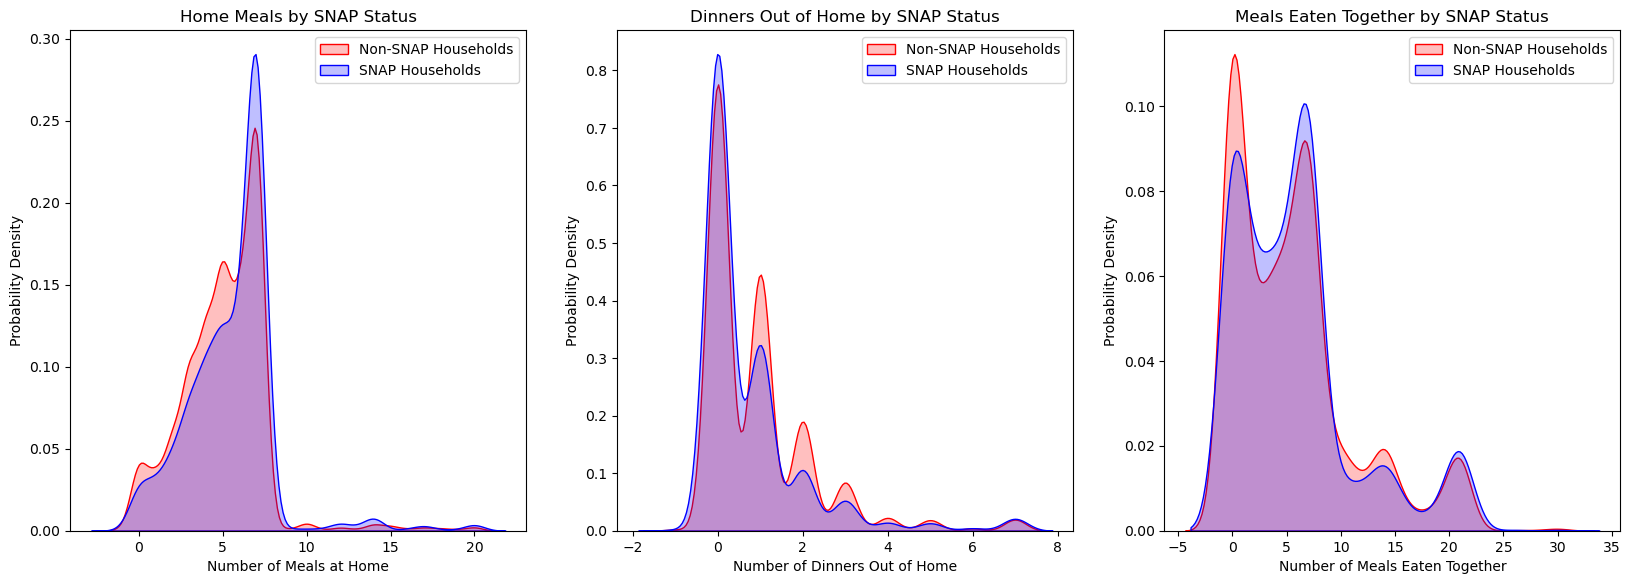

In [108]:
fig, ax = plt.subplots(1,3, figsize = (20,6.5))
plt.suptitle('Meals SNAP EDA')
plt.subplot(1,3,1)
density_plot(df_se, 'nmealshome', 'Number of Meals', 'Home Meals by SNAP Status')
plt.subplot(1,3,2)
density_plot(df_se,'ndinnersouthh', 'Number of Dinners','Dinners Out of Home by SNAP Status')
plt.subplot(1,3,3)
density_plot(df_se,'nmealstogether', 'Number of Meals','Meals Eaten Together by SNAP Status')


#### Vehicle SNAP Data

The vehicle data records in more detail the types of vehicle or transport access that the survey respondents have. 

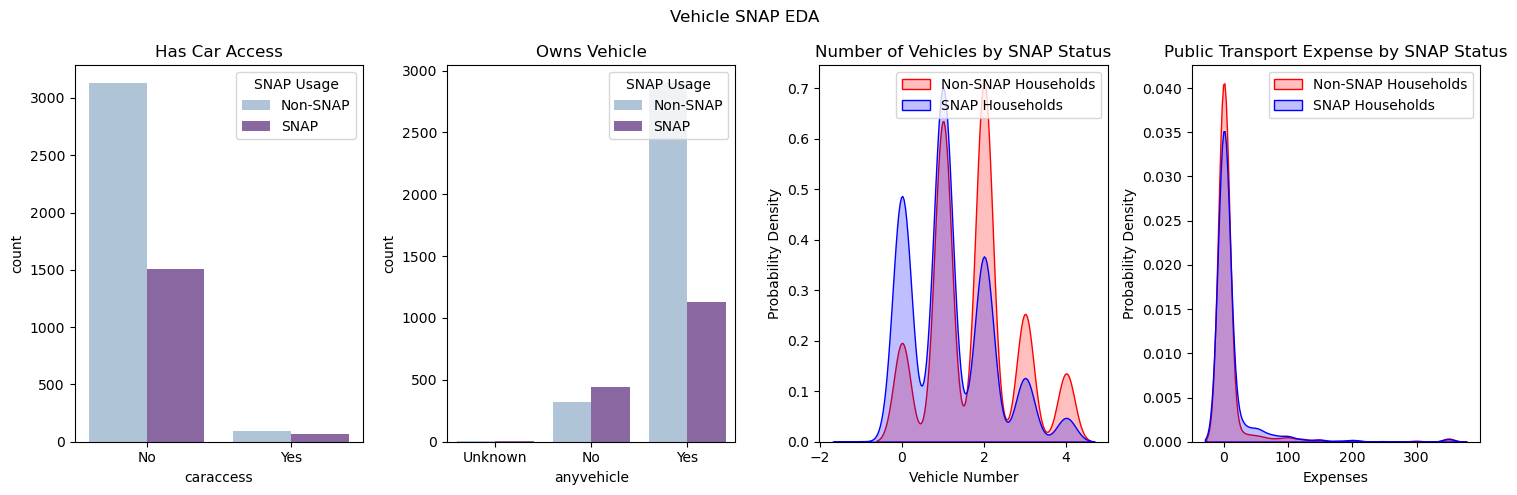

In [176]:
fig, ax = plt.subplots(1,4, figsize = (15,5))
plt.suptitle('Vehicle SNAP EDA')
plt.subplot(1,4,1)
barplot(df_se, 'caraccess', ['No', 'Yes'], 'Has Car Access')
plt.subplot(1,4,2)
barplot(df_se, 'anyvehicle',['Unknown','No', 'Yes'], 'Owns a Vehicle')
plt.subplot(1,4,3)
density_plot(df_se, 'vehiclenum','Number of Vehicles', 'Vehicle Count by SNAP Status')
plt.subplot(1,4,4)
density_plot(df_se, 'exppubtrans_r','Expenses', 'Public Transport Expense by SNAP Status')
plt.tight_layout()

From the graphs above, there seems to be a visual difference for SNAP recipients and Non-SNAP Recipients when it comes to owning a vehicle and the number of vehicles. Public Transport expense does not seem to have a difference in the distributions betewen these two subgroups.

## Food Distance and Travel Time

These reports on the distance and time it takes survey respondents to access their nearest food store. It also reports how respondents will travel to get to the food store. <br>
<br>
Also indicates if the survey respondents had shopped at certain stores in the last 30 days.

#### Primary Food Store

C:\Users\liana.principe\AppData\Local\Temp\ipykernel_15964\2462071443.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)
C:\Users\liana.principe\AppData\Local\Temp\ipykernel_15964\2462071443.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,2)
C:\Users\liana.principe\AppData\Local\Temp\ipykernel_15964\2462071443.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,3)


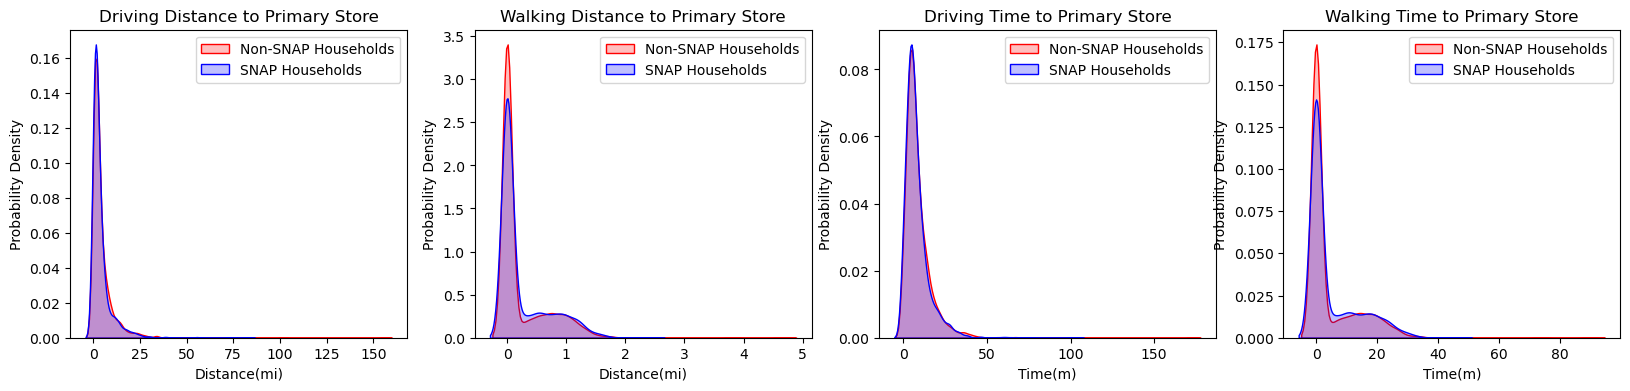

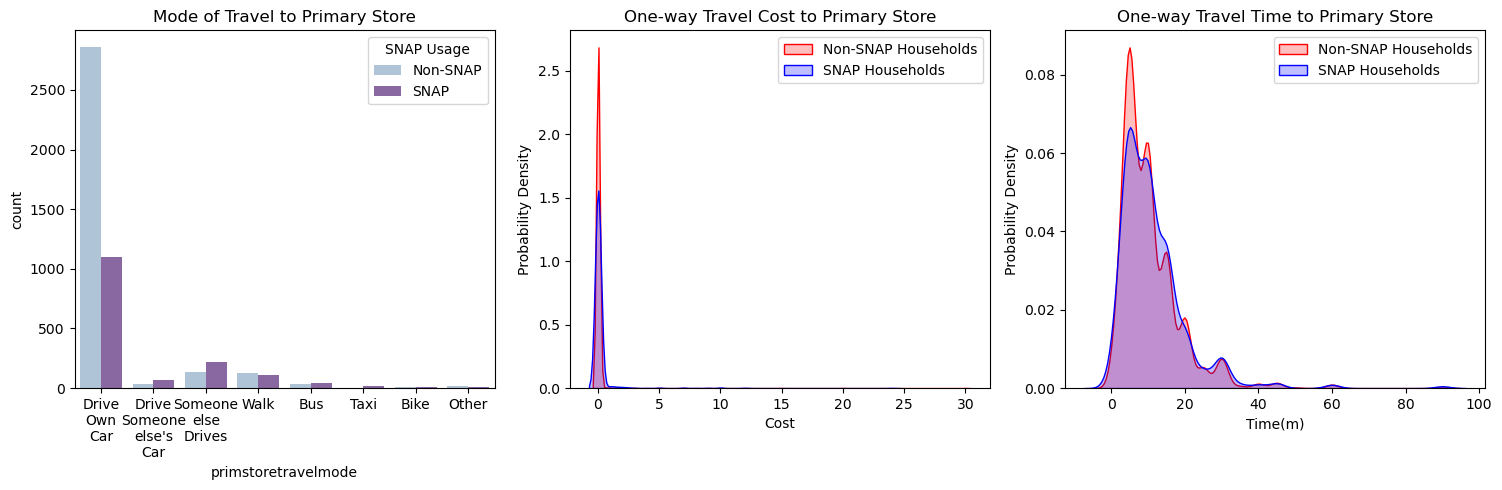

In [18]:
plt.subplots(1,4, figsize = (20,4))
plt.subplot(1,4,1)
density_plot(df_se, 'primstoredist_d','Distance(mi)','Driving Distance to Primary Store')
plt.subplot(1,4,2)
density_plot(df_se, 'primstoredist_w', 'Distance(mi)','Walking Distance to Primary Store')
plt.subplot(1,4,3)
density_plot(df_se, 'primstoretime_d', 'Time(m)','Driving Time to Primary Store')
plt.subplot(1,4,4)
density_plot(df_se, 'primstoretime_w', 'Time(m)','Walking Time to Primary Store')

plt.subplots(1,3, figsize = (20,5))
plt.subplot(1,4,1)
barplot(df_se, 'primstoretravelmode',['Drive\nOwn\nCar',"Drive\nSomeone\nelse's\nCar", "Someone\nelse\nDrives","Walk",'Bus','Taxi','Bike','Other'],'Mode of Travel to Primary Store')
plt.subplot(1,4,2)
density_plot(df_se, 'primstoretravelcost', 'Cost','One-way Travel Cost to Primary Store')
plt.subplot(1,4,3)
density_plot(df_se, 'primstoretraveltime', 'Time(m)','One-way Travel Time to Primary Store')
plt.tight_layout()

The above graph shows that One-way travel cost to primary store looks nearly binary, however looking closer at the data in that column shows that it is numerical data that is highly skewed to the right.

In [22]:
df_se['primstoretravelcost'].describe()

count    4798.000000
mean        0.066549
std         0.849919
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        30.000000
Name: primstoretravelcost, dtype: float64

#### Stores Shopped at in the Last 30 Days

In [33]:
#Consolidating data to rows that only have valid responses
print(df_se.shape)
store_df_se = df_se.loc[df_se['shopclub']!=-1,:]
print(store_df_se.shape)

(4798, 96)
(4796, 96)


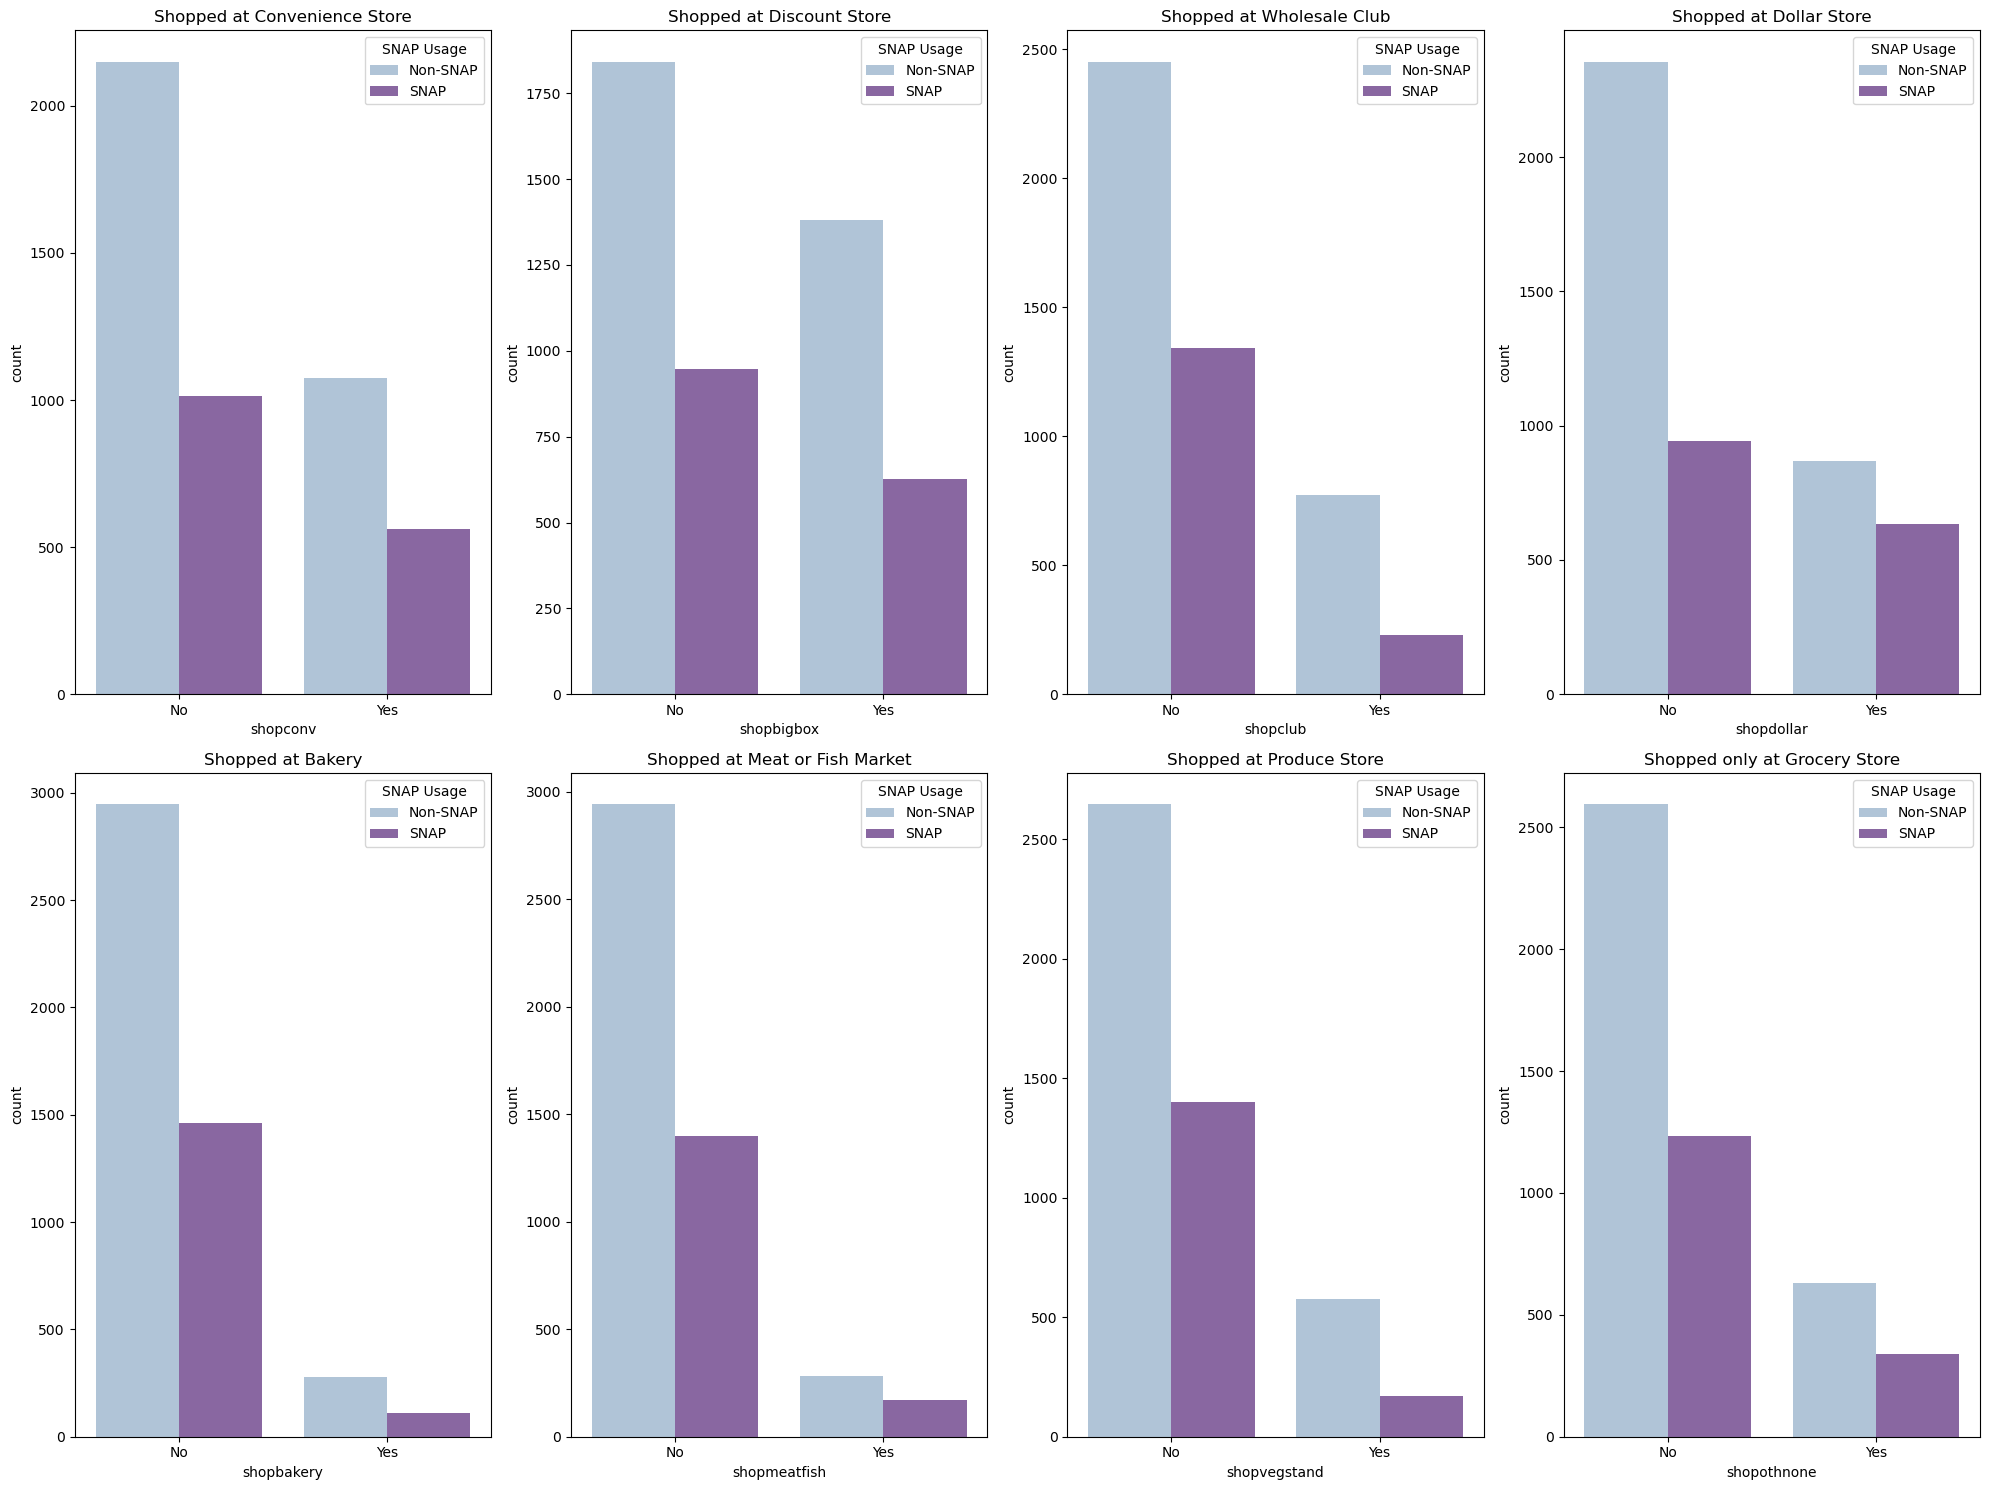

In [34]:
plt.subplots(2,4, figsize = (18,15))
plt.subplot(2,4,1)
barplot(store_df_se, 'shopconv',['No','Yes'],'Shopped at Convenience Store')
plt.subplot(2,4,2)
barplot(store_df_se, 'shopbigbox', ['No','Yes'],'Shopped at Discount Store')
plt.subplot(2,4,3)
barplot(store_df_se, 'shopclub', ['No','Yes'],'Shopped at Wholesale Club')
plt.subplot(2,4,4)
barplot(store_df_se, 'shopdollar', ['No','Yes'],'Shopped at Dollar Store')
plt.subplot(2,4,5)
barplot(store_df_se, 'shopbakery',['No','Yes'],'Shopped at Bakery')
plt.subplot(2,4,6)
barplot(store_df_se, 'shopmeatfish',['No','Yes'], 'Shopped at Meat or Fish Market')
plt.subplot(2,4,7)
barplot(store_df_se, 'shopvegstand',['No','Yes'],'Shopped at Produce Store')
plt.subplot(2,4,8)
barplot(store_df_se, 'shopothnone',['No','Yes'],'Shopped only at Grocery Store')
plt.tight_layout()

After the EDA process on types of stores shopped at in the last 30 days form survey respondents, the graphs visually indicate that discount stores, wholesale clubs, and produce stores are significant store activity in predicting SNAP Benefit utilization. While the graphs might indicate this, this will be further considered when making the model.

#### Alternative Food Store

In [ ]:
altstoredist_s, altstoredist_d, altstoretime_d, altstoredist_w, altstoretime_w

## Food Spport EDA

In [134]:
x_fs,y_fs, df_fs, nulls_df = data_processing.SNAP_clean(all_df,food_support ,'snapnowhh')
display(df_fs.head())

,usdafoods,wiccategelig,wichh,mealdelivery,mealfacility,foodpantry,snapnowhh
hhnum,,,,,,,
100012,0,1,0,0,0,0,1
100015,0,0,0,0,1,0,0
100024,0,1,0,0,0,0,0
100026,0,1,0,0,0,0,0
100028,0,1,1,0,0,0,1


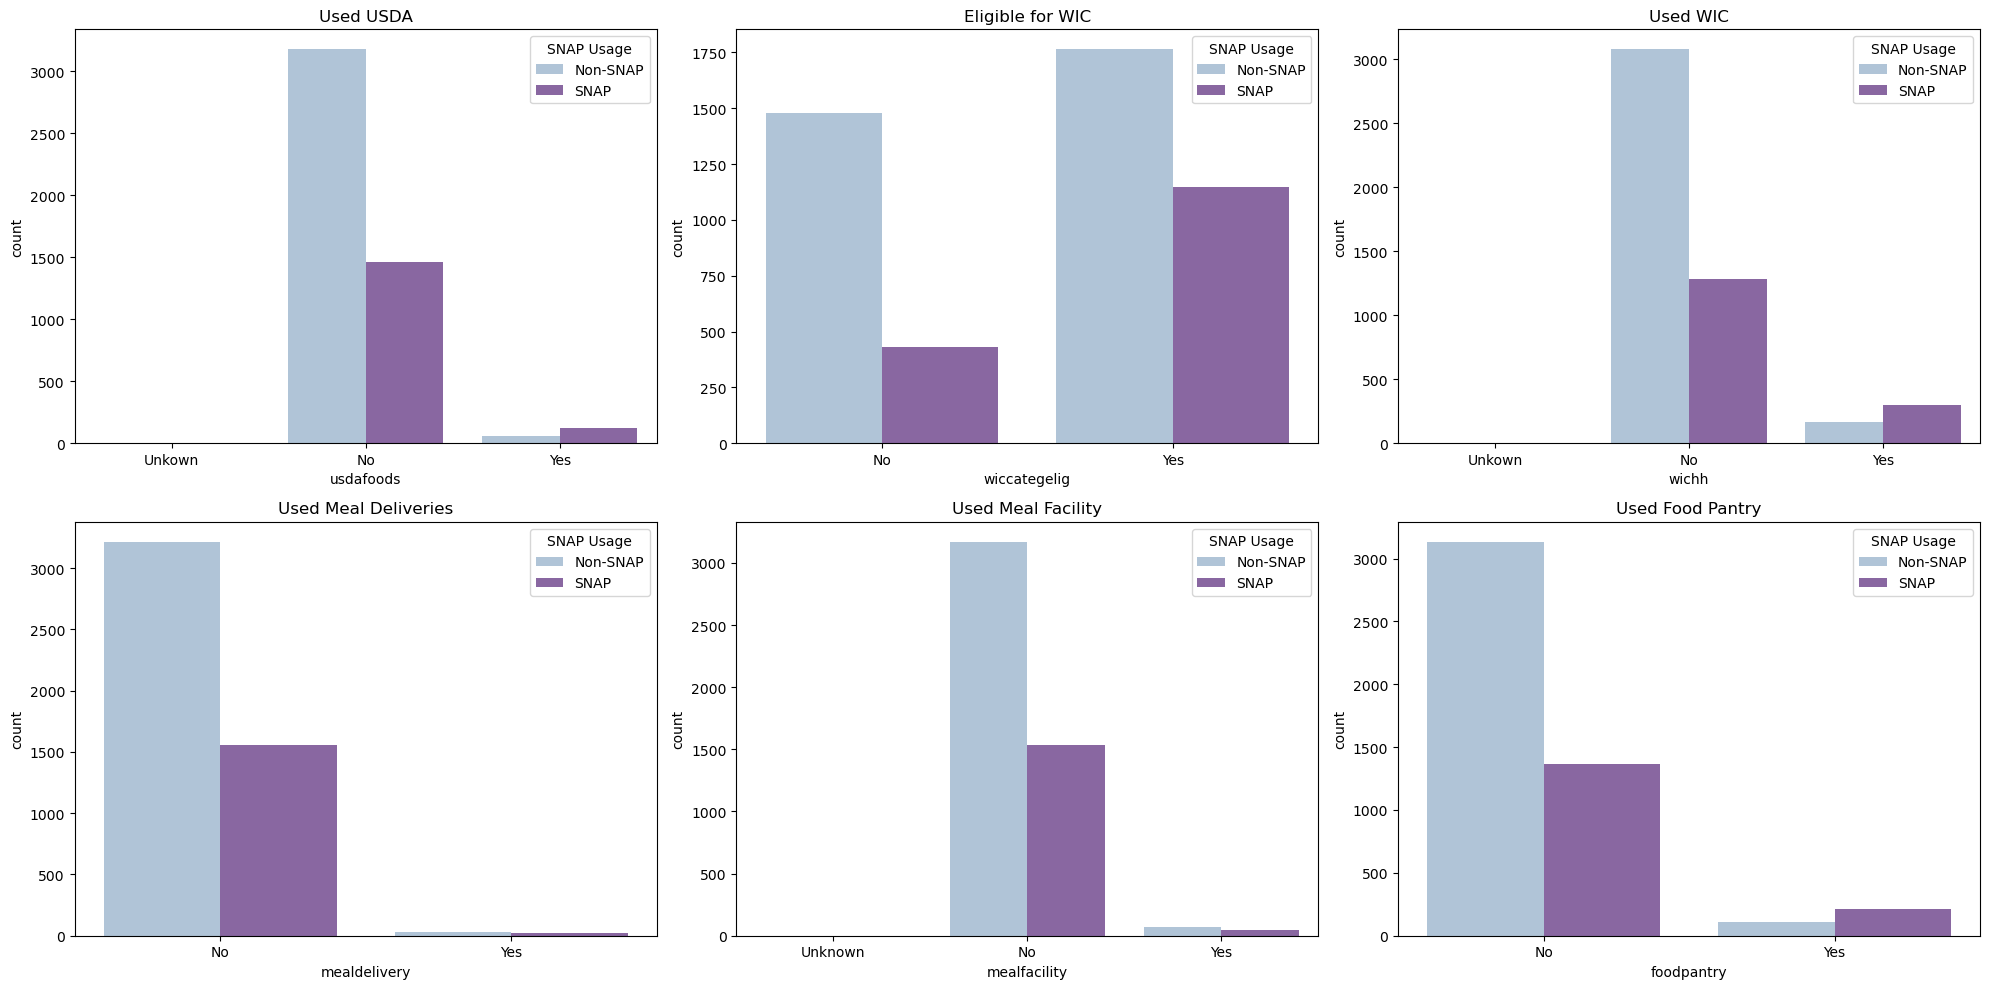

In [159]:
fig, ax = plt.subplots(2,3, figsize = (20,10))
plt.subplot(2,3,1)
barplot(df_fs, 'usdafoods',['Unkown','No','Yes'],'Used USDA')
plt.subplot(2,3,2)
barplot(df_fs, 'wiccategelig',['No','Yes'], 'Eligible for WIC')
plt.subplot(2,3,3)
barplot(df_fs, 'wichh',['Unkown','No','Yes'], 'Used WIC')
plt.subplot(2,3,4)
barplot(df_fs, 'mealdelivery',['No','Yes'], 'Used Meal Deliveries')
plt.subplot(2,3,5)
barplot(df_fs, 'mealfacility',['Unknown','No','Yes'], 'Used Meal Facility')
plt.subplot(2,3,6)
barplot(df_fs, 'foodpantry',['No','Yes'], 'Used Food Pantry')
plt.tight_layout()

## Nutrition Survey EDA

In [20]:
x_ns,y_ns, df_ns, nulls_df = data_processing.SNAP_clean(all_df,nutrition_survey ,'snapnowhh')

,dietstatuspr,dietstatushh,healthycost,healthytime,healthytastepr,healthytastehh,eathealthyhh,myplate,myplatefollow,mypyramid,foodpyramid,mypyramidsearch,mypyramidfollow,fruitsveg,nutritionfacts,nutritioneduc,nutritionsearch,snapnowhh
hhnum,,,,,,,,,,,,,,,,,,
100012,4,5,0,1,0,1,0,0,0,1,0,0,0,2,3,0,0,1
100015,4,0,0,0,0,0,0,0,0,0,0,0,0,2,5,0,0,0
100024,3,3,0,0,0,0,0,0,0,1,0,0,0,2,4,0,0,0
100026,4,4,0,1,0,1,0,0,0,0,1,0,1,1,3,0,1,0
100028,4,3,0,0,0,1,0,0,0,1,0,0,0,2,4,0,0,1


## Food Security Survey EDA

The data from this food security section is a separate conducted survey that asks the survey respondents specific questions about their relationship to food and to describe their thoughts and feelings on their relationship or access to food. Based on these answers, a food security score was adressed to each household. For the purpose of this research and to preserve reproducibility in the model in this project, this section of the dataset will not be considered when training the model.This decision is conducted under the idea that this data is unlikely to appear in other datasets which would render the model unusable or less accurate.

EDA is still advised to be conducted on this data for better understanding and background knowledge.

In [35]:
x_foodsec,y_foodsec, df_foodsec, nulls_df = data_processing.SNAP_clean(all_df,food_security_survey ,'snapnowhh')

,adltfsraw,adltfscat,foodsufficient,foodsecureq1,foodsecureq2,foodsecureq3,foodsecureq4,foodsecureq5,foodsecureq6,foodsecureq7,foodsecureq8,foodsecureq9,foodsecureq10,fincondition,billrevfreq,billsontimefreq,payaboveminfreq,snapnowhh
hhnum,,,,,,,,,,,,,,,,,,
100012,1,2,2,3,3,2,0,0,0,0,0,0,0,4,1,4,1,1
100015,2,2,3,2,2,3,0,0,0,0,0,0,0,3,5,5,5,0
100024,2,2,2,2,2,3,0,0,0,0,0,0,0,3,1,3,3,0
100026,4,3,2,1,2,2,0,0,0,1,0,0,0,3,5,3,6,0
100028,9,4,3,1,1,2,1,3,1,1,0,1,7,4,4,2,6,1
